In [148]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from colorthief import ColorThief
from matplotlib import gridspec
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.preprocessing import image
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from PIL import Image 
from mpl_toolkits.mplot3d import Axes3D

import cv2
import sys
import os

In [254]:
image_path = "posters/movie2.png"
color_thief = ColorThief(image_path)

count = 2
dominant_color = color_thief.get_color(quality=5)
palette = color_thief.get_palette(color_count=count)
dominant_color

(40, 34, 56)

In [252]:
palette2 = []
dc = tuple(ti/255 for ti in dominant_color)

for i in palette:
    c = tuple(ti/ 255 for ti in i)
    palette2.append(c)

print(dc)
palette2.sort()
palette2

(0.1568627450980392, 0.13333333333333333, 0.2196078431372549)


[(0.1568627450980392, 0.13333333333333333, 0.2196078431372549),
 (0.6745098039215687, 0.10588235294117647, 0.47058823529411764),
 (0.9568627450980393, 0.5764705882352941, 0.8313725490196079)]

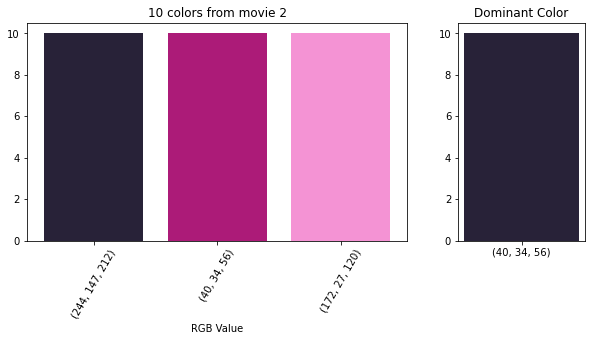

In [253]:
x = []
y=[]
for i in range(0,len(palette2)):
    x.append(str(palette[i]))
    y.append(10)

fig = plt.subplots(figsize = (10,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 

plt.subplot(gs[0])
plt.bar(x,y,color=palette2)
plt.xlabel('RGB Value')
plt.xticks(rotation=60)
plt.title('10 colors from movie 2')
plt.subplot(gs[1])
plt.bar(str(dominant_color),10,color=dc)
plt.title('Dominant Color')
plt.show()

In [5]:
#Folder specification
folder = "posters"

# formatting image dimensions
img_width = 350
img_height = 350
img_count = len([item for item in os.listdir('posters') if os.path.isfile(os.path.join('posters', item))])

# Formats each image present in folder, and adds them to an array.
def processImages(folder):
    img_array = []

    i = 0
    while i < img_count:
        filename = (folder + "/movie") + str(i) + ".png"
        img = image.load_img(filename, target_size = (img_width, img_height, 3))
        img = image.img_to_array(img) # Converting the image to an array
        img = img / 255.0 # Converting to neural network preferred values
        img_array.append(img)
        i = i + 1
    img_array = np.array(img_array)
    return img_array


#Creates CNN to classify images
def setupData():
    data = pd.read_csv("mov_IDs.csv")
    i = -1  
    for genres in data['Genres']:
        i = i + 1
        genres = genres.split()
        for genre in genres:
            if genre == "TV":
                genre = "TV Movie"
            
            if genre == "Science":
                genre = "Science Fiction"
            if genre == "Movie" or genre == "Fiction":
                continue
                
            if genre not in data.columns:
                data[genre] = [0 for a in range(0,img_count)]
            data.iloc[i, data.columns.get_loc(genre)] = 1
#     print(data)

    dataModel = data.drop(['Title', 'Genres', 'Poster_Path', 'Release_Date', 'Language', 'Popularity', 'ID'], axis = 1)
    # dataModel = dataModel.drop(dataModel.index[10:5000])
#     print(dataModel)
    dataModel = dataModel.to_numpy()
    img_array = []
#     img_array = processImages(folder)
    return data, dataModel, img_array

Data exploration of Genres

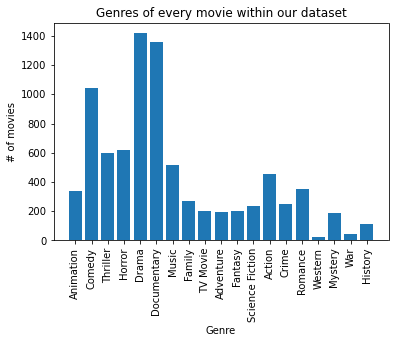

In [6]:
def plotGenre():
    data, dataModel, img_array = setupData()
    genres = data.columns[7:]
    genreX = []
    genreY = []
    for x in genres:
        genreX.append(x)
        genreY.append(len(data.loc[data[x] == 1]))

    plt.title('Genres of every movie within our dataset')
    plt.xticks(rotation = 90)
    plt.bar(x = genreX, height = genreY)
    plt.xlabel('Genre')
    plt.ylabel('# of movies')
    plt.savefig('charts/genre.png',bbox_inches='tight')
plotGenre()

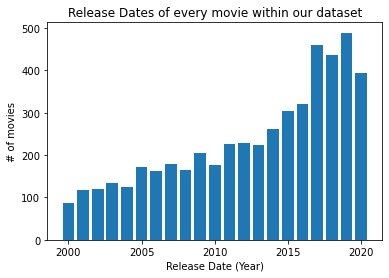

In [7]:
def plotDate():
    data, dataModel, img_array = setupData()
    dateX = [*range(2000,2021,1)]
    dateY = []
    for x in dateX:
        count = 0
        for y in data['Release_Date']:
            if str(x) == y[0:4]:
                count += 1
        dateY.append(count)
    plt.title('Release Dates of every movie within our dataset')
    plt.bar(x = dateX, height = dateY)
    plt.xlabel('Release Date (Year)')
    plt.ylabel('# of movies')
    plt.savefig('charts/dates.png',bbox_inches='tight') 
plotDate()

In [23]:
domcol = []
colPal = []
count = 10
data, dataModel, img_array = setupData()
for x in data['Poster_Path']:
    print(x)
    img = cv2.imread(x) 
    width = 350
    height = 350
    dim = (width, height) 
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 
    new_path = 'resized/' + x[8:]
    cv2.imwrite(new_path, resized)
    
    color_thief = ColorThief(new_path)
    dominant_color = color_thief.get_color(quality=1)
    palette = color_thief.get_palette(color_count=count)
    domcol.append(dominant_color)
    colPal.append(palette)
data['palette'] = colPal
data['dominant_color'] = domcol
data.to_csv('movie_colors.csv', index=False)

posters/movie0.png
posters/movie1.png
posters/movie2.png
posters/movie3.png
posters/movie4.png
posters/movie5.png
posters/movie6.png
posters/movie7.png
posters/movie8.png
posters/movie9.png
posters/movie10.png
posters/movie11.png
posters/movie12.png
posters/movie13.png
posters/movie14.png
posters/movie15.png
posters/movie16.png
posters/movie17.png
posters/movie18.png
posters/movie19.png
posters/movie20.png
posters/movie21.png
posters/movie22.png
posters/movie23.png
posters/movie24.png
posters/movie25.png
posters/movie26.png
posters/movie27.png
posters/movie28.png
posters/movie29.png
posters/movie30.png
posters/movie31.png
posters/movie32.png
posters/movie33.png
posters/movie34.png
posters/movie35.png
posters/movie36.png
posters/movie37.png
posters/movie38.png
posters/movie39.png
posters/movie40.png
posters/movie41.png
posters/movie42.png
posters/movie43.png
posters/movie44.png
posters/movie45.png
posters/movie46.png
posters/movie47.png
posters/movie48.png
posters/movie49.png
posters/mo

posters/movie396.png
posters/movie397.png
posters/movie398.png
posters/movie399.png
posters/movie400.png
posters/movie401.png
posters/movie402.png
posters/movie403.png
posters/movie404.png
posters/movie405.png
posters/movie406.png
posters/movie407.png
posters/movie408.png
posters/movie409.png
posters/movie410.png
posters/movie411.png
posters/movie412.png
posters/movie413.png
posters/movie414.png
posters/movie415.png
posters/movie416.png
posters/movie417.png
posters/movie418.png
posters/movie419.png
posters/movie420.png
posters/movie421.png
posters/movie422.png
posters/movie423.png
posters/movie424.png
posters/movie425.png
posters/movie426.png
posters/movie427.png
posters/movie428.png
posters/movie429.png
posters/movie430.png
posters/movie431.png
posters/movie432.png
posters/movie433.png
posters/movie434.png
posters/movie435.png
posters/movie436.png
posters/movie437.png
posters/movie438.png
posters/movie439.png
posters/movie440.png
posters/movie441.png
posters/movie442.png
posters/movie

posters/movie787.png
posters/movie788.png
posters/movie789.png
posters/movie790.png
posters/movie791.png
posters/movie792.png
posters/movie793.png
posters/movie794.png
posters/movie795.png
posters/movie796.png
posters/movie797.png
posters/movie798.png
posters/movie799.png
posters/movie800.png
posters/movie801.png
posters/movie802.png
posters/movie803.png
posters/movie804.png
posters/movie805.png
posters/movie806.png
posters/movie807.png
posters/movie808.png
posters/movie809.png
posters/movie810.png
posters/movie811.png
posters/movie812.png
posters/movie813.png
posters/movie814.png
posters/movie815.png
posters/movie816.png
posters/movie817.png
posters/movie818.png
posters/movie819.png
posters/movie820.png
posters/movie821.png
posters/movie822.png
posters/movie823.png
posters/movie824.png
posters/movie825.png
posters/movie826.png
posters/movie827.png
posters/movie828.png
posters/movie829.png
posters/movie830.png
posters/movie831.png
posters/movie832.png
posters/movie833.png
posters/movie

posters/movie1170.png
posters/movie1171.png
posters/movie1172.png
posters/movie1173.png
posters/movie1174.png
posters/movie1175.png
posters/movie1176.png
posters/movie1177.png
posters/movie1178.png
posters/movie1179.png
posters/movie1180.png
posters/movie1181.png
posters/movie1182.png
posters/movie1183.png
posters/movie1184.png
posters/movie1185.png
posters/movie1186.png
posters/movie1187.png
posters/movie1188.png
posters/movie1189.png
posters/movie1190.png
posters/movie1191.png
posters/movie1192.png
posters/movie1193.png
posters/movie1194.png
posters/movie1195.png
posters/movie1196.png
posters/movie1197.png
posters/movie1198.png
posters/movie1199.png
posters/movie1200.png
posters/movie1201.png
posters/movie1202.png
posters/movie1203.png
posters/movie1204.png
posters/movie1205.png
posters/movie1206.png
posters/movie1207.png
posters/movie1208.png
posters/movie1209.png
posters/movie1210.png
posters/movie1211.png
posters/movie1212.png
posters/movie1213.png
posters/movie1214.png
posters/mo

posters/movie1543.png
posters/movie1544.png
posters/movie1545.png
posters/movie1546.png
posters/movie1547.png
posters/movie1548.png
posters/movie1549.png
posters/movie1550.png
posters/movie1551.png
posters/movie1552.png
posters/movie1553.png
posters/movie1554.png
posters/movie1555.png
posters/movie1556.png
posters/movie1557.png
posters/movie1558.png
posters/movie1559.png
posters/movie1560.png
posters/movie1561.png
posters/movie1562.png
posters/movie1563.png
posters/movie1564.png
posters/movie1565.png
posters/movie1566.png
posters/movie1567.png
posters/movie1568.png
posters/movie1569.png
posters/movie1570.png
posters/movie1571.png
posters/movie1572.png
posters/movie1573.png
posters/movie1574.png
posters/movie1575.png
posters/movie1576.png
posters/movie1577.png
posters/movie1578.png
posters/movie1579.png
posters/movie1580.png
posters/movie1581.png
posters/movie1582.png
posters/movie1583.png
posters/movie1584.png
posters/movie1585.png
posters/movie1586.png
posters/movie1587.png
posters/mo

posters/movie1916.png
posters/movie1917.png
posters/movie1918.png
posters/movie1919.png
posters/movie1920.png
posters/movie1921.png
posters/movie1922.png
posters/movie1923.png
posters/movie1924.png
posters/movie1925.png
posters/movie1926.png
posters/movie1927.png
posters/movie1928.png
posters/movie1929.png
posters/movie1930.png
posters/movie1931.png
posters/movie1932.png
posters/movie1933.png
posters/movie1934.png
posters/movie1935.png
posters/movie1936.png
posters/movie1937.png
posters/movie1938.png
posters/movie1939.png
posters/movie1940.png
posters/movie1941.png
posters/movie1942.png
posters/movie1943.png
posters/movie1944.png
posters/movie1945.png
posters/movie1946.png
posters/movie1947.png
posters/movie1948.png
posters/movie1949.png
posters/movie1950.png
posters/movie1951.png
posters/movie1952.png
posters/movie1953.png
posters/movie1954.png
posters/movie1955.png
posters/movie1956.png
posters/movie1957.png
posters/movie1958.png
posters/movie1959.png
posters/movie1960.png
posters/mo

posters/movie2289.png
posters/movie2290.png
posters/movie2291.png
posters/movie2292.png
posters/movie2293.png
posters/movie2294.png
posters/movie2295.png
posters/movie2296.png
posters/movie2297.png
posters/movie2298.png
posters/movie2299.png
posters/movie2300.png
posters/movie2301.png
posters/movie2302.png
posters/movie2303.png
posters/movie2304.png
posters/movie2305.png
posters/movie2306.png
posters/movie2307.png
posters/movie2308.png
posters/movie2309.png
posters/movie2310.png
posters/movie2311.png
posters/movie2312.png
posters/movie2313.png
posters/movie2314.png
posters/movie2315.png
posters/movie2316.png
posters/movie2317.png
posters/movie2318.png
posters/movie2319.png
posters/movie2320.png
posters/movie2321.png
posters/movie2322.png
posters/movie2323.png
posters/movie2324.png
posters/movie2325.png
posters/movie2326.png
posters/movie2327.png
posters/movie2328.png
posters/movie2329.png
posters/movie2330.png
posters/movie2331.png
posters/movie2332.png
posters/movie2333.png
posters/mo

posters/movie2662.png
posters/movie2663.png
posters/movie2664.png
posters/movie2665.png
posters/movie2666.png
posters/movie2667.png
posters/movie2668.png
posters/movie2669.png
posters/movie2670.png
posters/movie2671.png
posters/movie2672.png
posters/movie2673.png
posters/movie2674.png
posters/movie2675.png
posters/movie2676.png
posters/movie2677.png
posters/movie2678.png
posters/movie2679.png
posters/movie2680.png
posters/movie2681.png
posters/movie2682.png
posters/movie2683.png
posters/movie2684.png
posters/movie2685.png
posters/movie2686.png
posters/movie2687.png
posters/movie2688.png
posters/movie2689.png
posters/movie2690.png
posters/movie2691.png
posters/movie2692.png
posters/movie2693.png
posters/movie2694.png
posters/movie2695.png
posters/movie2696.png
posters/movie2697.png
posters/movie2698.png
posters/movie2699.png
posters/movie2700.png
posters/movie2701.png
posters/movie2702.png
posters/movie2703.png
posters/movie2704.png
posters/movie2705.png
posters/movie2706.png
posters/mo

posters/movie3035.png
posters/movie3036.png
posters/movie3037.png
posters/movie3038.png
posters/movie3039.png
posters/movie3040.png
posters/movie3041.png
posters/movie3042.png
posters/movie3043.png
posters/movie3044.png
posters/movie3045.png
posters/movie3046.png
posters/movie3047.png
posters/movie3048.png
posters/movie3049.png
posters/movie3050.png
posters/movie3051.png
posters/movie3052.png
posters/movie3053.png
posters/movie3054.png
posters/movie3055.png
posters/movie3056.png
posters/movie3057.png
posters/movie3058.png
posters/movie3059.png
posters/movie3060.png
posters/movie3061.png
posters/movie3062.png
posters/movie3063.png
posters/movie3064.png
posters/movie3065.png
posters/movie3066.png
posters/movie3067.png
posters/movie3068.png
posters/movie3069.png
posters/movie3070.png
posters/movie3071.png
posters/movie3072.png
posters/movie3073.png
posters/movie3074.png
posters/movie3075.png
posters/movie3076.png
posters/movie3077.png
posters/movie3078.png
posters/movie3079.png
posters/mo

posters/movie3408.png
posters/movie3409.png
posters/movie3410.png
posters/movie3411.png
posters/movie3412.png
posters/movie3413.png
posters/movie3414.png
posters/movie3415.png
posters/movie3416.png
posters/movie3417.png
posters/movie3418.png
posters/movie3419.png
posters/movie3420.png
posters/movie3421.png
posters/movie3422.png
posters/movie3423.png
posters/movie3424.png
posters/movie3425.png
posters/movie3426.png
posters/movie3427.png
posters/movie3428.png
posters/movie3429.png
posters/movie3430.png
posters/movie3431.png
posters/movie3432.png
posters/movie3433.png
posters/movie3434.png
posters/movie3435.png
posters/movie3436.png
posters/movie3437.png
posters/movie3438.png
posters/movie3439.png
posters/movie3440.png
posters/movie3441.png
posters/movie3442.png
posters/movie3443.png
posters/movie3444.png
posters/movie3445.png
posters/movie3446.png
posters/movie3447.png
posters/movie3448.png
posters/movie3449.png
posters/movie3450.png
posters/movie3451.png
posters/movie3452.png
posters/mo

posters/movie3781.png
posters/movie3782.png
posters/movie3783.png
posters/movie3784.png
posters/movie3785.png
posters/movie3786.png
posters/movie3787.png
posters/movie3788.png
posters/movie3789.png
posters/movie3790.png
posters/movie3791.png
posters/movie3792.png
posters/movie3793.png
posters/movie3794.png
posters/movie3795.png
posters/movie3796.png
posters/movie3797.png
posters/movie3798.png
posters/movie3799.png
posters/movie3800.png
posters/movie3801.png
posters/movie3802.png
posters/movie3803.png
posters/movie3804.png
posters/movie3805.png
posters/movie3806.png
posters/movie3807.png
posters/movie3808.png
posters/movie3809.png
posters/movie3810.png
posters/movie3811.png
posters/movie3812.png
posters/movie3813.png
posters/movie3814.png
posters/movie3815.png
posters/movie3816.png
posters/movie3817.png
posters/movie3818.png
posters/movie3819.png
posters/movie3820.png
posters/movie3821.png
posters/movie3822.png
posters/movie3823.png
posters/movie3824.png
posters/movie3825.png
posters/mo

posters/movie4154.png
posters/movie4155.png
posters/movie4156.png
posters/movie4157.png
posters/movie4158.png
posters/movie4159.png
posters/movie4160.png
posters/movie4161.png
posters/movie4162.png
posters/movie4163.png
posters/movie4164.png
posters/movie4165.png
posters/movie4166.png
posters/movie4167.png
posters/movie4168.png
posters/movie4169.png
posters/movie4170.png
posters/movie4171.png
posters/movie4172.png
posters/movie4173.png
posters/movie4174.png
posters/movie4175.png
posters/movie4176.png
posters/movie4177.png
posters/movie4178.png
posters/movie4179.png
posters/movie4180.png
posters/movie4181.png
posters/movie4182.png
posters/movie4183.png
posters/movie4184.png
posters/movie4185.png
posters/movie4186.png
posters/movie4187.png
posters/movie4188.png
posters/movie4189.png
posters/movie4190.png
posters/movie4191.png
posters/movie4192.png
posters/movie4193.png
posters/movie4194.png
posters/movie4195.png
posters/movie4196.png
posters/movie4197.png
posters/movie4198.png
posters/mo

posters/movie4527.png
posters/movie4528.png
posters/movie4529.png
posters/movie4530.png
posters/movie4531.png
posters/movie4532.png
posters/movie4533.png
posters/movie4534.png
posters/movie4535.png
posters/movie4536.png
posters/movie4537.png
posters/movie4538.png
posters/movie4539.png
posters/movie4540.png
posters/movie4541.png
posters/movie4542.png
posters/movie4543.png
posters/movie4544.png
posters/movie4545.png
posters/movie4546.png
posters/movie4547.png
posters/movie4548.png
posters/movie4549.png
posters/movie4550.png
posters/movie4551.png
posters/movie4552.png
posters/movie4553.png
posters/movie4554.png
posters/movie4555.png
posters/movie4556.png
posters/movie4557.png
posters/movie4558.png
posters/movie4559.png
posters/movie4560.png
posters/movie4561.png
posters/movie4562.png
posters/movie4563.png
posters/movie4564.png
posters/movie4565.png
posters/movie4566.png
posters/movie4567.png
posters/movie4568.png
posters/movie4569.png
posters/movie4570.png
posters/movie4571.png
posters/mo

posters/movie4900.png
posters/movie4901.png
posters/movie4902.png
posters/movie4903.png
posters/movie4904.png
posters/movie4905.png
posters/movie4906.png
posters/movie4907.png
posters/movie4908.png
posters/movie4909.png
posters/movie4910.png
posters/movie4911.png
posters/movie4912.png
posters/movie4913.png
posters/movie4914.png
posters/movie4915.png
posters/movie4916.png
posters/movie4917.png
posters/movie4918.png
posters/movie4919.png
posters/movie4920.png
posters/movie4921.png
posters/movie4922.png
posters/movie4923.png
posters/movie4924.png
posters/movie4925.png
posters/movie4926.png
posters/movie4927.png
posters/movie4928.png
posters/movie4929.png
posters/movie4930.png
posters/movie4931.png
posters/movie4932.png
posters/movie4933.png
posters/movie4934.png
posters/movie4935.png
posters/movie4936.png
posters/movie4937.png
posters/movie4938.png
posters/movie4939.png
posters/movie4940.png
posters/movie4941.png
posters/movie4942.png
posters/movie4943.png
posters/movie4944.png
posters/mo

,Title,Genres,Poster_Path,Language,Release_Date,Popularity,ID,Animation,Comedy,Thriller,...,Science Fiction,Action,Crime,Romance,Western,Mystery,War,History,palette,dominant_color
0,"""Nine to Fire""",Animation Comedy,posters/movie0.png,en,2011-06-20,0.600,560099,1,1,0,...,0,0,0,0,0,0,0,0,"[(115, 37, 31), (34, 15, 21), (235, 222, 104),...","(226, 205, 102)"
1,"""The Hellion""",Thriller Horror Drama,posters/movie1.png,en,2014-10-30,0.840,459999,0,0,1,...,0,0,0,0,0,0,0,0,"[(87, 83, 65), (12, 13, 12), (192, 192, 191), ...","(19, 19, 17)"
2,"""So Pretty""",Drama,posters/movie2.png,en,2019-02-10,4.168,576105,0,0,0,...,0,0,0,0,0,0,0,0,"[(40, 33, 55), (251, 147, 219), (161, 131, 129...","(40, 34, 56)"
3,"""The Fifth Estate""",Drama Thriller,posters/movie3.png,en,2013-10-11,10.440,162903,0,0,1,...,0,0,0,0,0,0,0,0,"[(198, 195, 187), (29, 57, 92), (21, 18, 28), ...","(44, 73, 106)"
4,"""Last Girl Standing""",Drama Horror,posters/movie4.png,en,2015-08-31,5.012,347848,0,0,0,...,0,0,0,0,0,0,0,0,"[(198, 66, 55), (23, 22, 22), (108, 52, 48), (...","(202, 77, 67)"


In [132]:

def convPal(d):
    data = d.copy()
    for col, f in enumerate(data['palette']):
        f = data.at[col,'palette']
        x =f.split('), (')
        idx = 0
        plet = []
        for y in x:
            if idx == 0:
                y = y[2:]
            elif idx == len(x) -1:
                y = y[:len(y)-2]
            res = tuple(map(int, y.split(', ')))
            plet.append(res)
            idx += 1
        data.at[col,'palette'] = plet
    
    return data

In [133]:
def convDom(d):
    data = d.copy()
    for col, f in enumerate(data['dominant_color']):
        res = tuple(map(int, f[1:len(f)-1].split(', ')))
        data.at[col,'dominant_color'] = res
#     print(data)
    return data

In [134]:
def domFloat(d):
    idx = 0
    data = d.copy()
    for x in data['dominant_color']:
        dc = tuple(ti/255 for ti in x)
        data.at[idx,'dominant_color'] = dc
        idx += 1
    return data

def palFloat(d):
    idx = 0
    data = d.copy()
    palette2 = []
    for x in data['palette']:
        for i in x:
            c = tuple(ti/ 255 for ti in i)
            palette2.append(c)
        data.at[idx,'palette'] = palette2
        idx += 1
    return data


In [216]:
col_df = pd.read_csv('movie_colors.csv')
col_df = convPal(col_df)
col_df = convDom(col_df)
# col_df = palFloat(col_df)
# col_df = domFloat(col_df)


In [237]:
col_df

,Title,Genres,Poster_Path,Language,Release_Date,Popularity,ID,Animation,Comedy,Thriller,...,Action,Crime,Romance,Western,Mystery,War,History,palette,dominant_color,dom_label
0,"""Nine to Fire""",Animation Comedy,posters/movie0.png,en,2011-06-20,0.600,560099,1,1,0,...,0,0,0,0,0,0,0,"[(115, 37, 31), (34, 15, 21), (235, 222, 104),...","[226, 205, 102]",0
1,"""The Hellion""",Thriller Horror Drama,posters/movie1.png,en,2014-10-30,0.840,459999,0,0,1,...,0,0,0,0,0,0,0,"[(87, 83, 65), (12, 13, 12), (192, 192, 191), ...","[19, 19, 17]",2
2,"""So Pretty""",Drama,posters/movie2.png,en,2019-02-10,4.168,576105,0,0,0,...,0,0,0,0,0,0,0,"[(40, 33, 55), (251, 147, 219), (161, 131, 129...","[40, 34, 56]",2
3,"""The Fifth Estate""",Drama Thriller,posters/movie3.png,en,2013-10-11,10.440,162903,0,0,1,...,0,0,0,0,0,0,0,"[(198, 195, 187), (29, 57, 92), (21, 18, 28), ...","[44, 73, 106]",2
4,"""Last Girl Standing""",Drama Horror,posters/movie4.png,en,2015-08-31,5.012,347848,0,0,0,...,0,0,0,0,0,0,0,"[(198, 66, 55), (23, 22, 22), (108, 52, 48), (...","[202, 77, 67]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,"""Ed Gein""",Crime Drama Horror Thriller,posters/movie4995.png,en,2000-11-17,9.607,55888,0,0,1,...,0,1,0,0,0,0,0,"[(192, 71, 15), (244, 226, 211), (106, 10, 6),...","[191, 71, 15]",1
4996,"""Anna Nicole""",Drama,posters/movie4996.png,en,2013-06-29,0.600,204784,0,0,0,...,0,0,0,0,0,0,0,"[(198, 169, 148), (21, 22, 24), (230, 211, 211...","[185, 159, 140]",1
4997,"""Phantom Cowboys""",Documentary,posters/movie4997.png,en,2018-04-22,1.711,510990,0,0,0,...,0,0,0,0,0,0,0,"[(91, 73, 74), (162, 145, 103), (239, 239, 218...","[91, 73, 75]",2
4998,"""Chris Botti Live: With Orchestra and Special ...",Music,posters/movie4998.png,en,2006-08-22,4.440,23498,0,0,0,...,0,0,0,0,0,0,0,"[(185, 183, 183), (7, 6, 6), (89, 74, 77), (15...","[11, 10, 10]",2


In [236]:
dom = col_df['dominant_color'].to_numpy()
X = [list(item) for item in dom]
kmeans = KMeans(n_clusters=3).fit(X)
col_df['dominant_color'] = X

In [246]:
gen_col = []
for x in col_df.columns[7:-3]:
    temp = col_df.loc[col_df[x] == 1]

    arr = temp['dominant_color'].to_numpy()
    rgb = []
    rsum = 0
    gsum = 0
    bsum = 0
    for y in arr:
        rsum += y[0]
        gsum += y[1]
        bsum += y[2]
    rsum = rsum / len(arr)
    gsum = gsum / len(arr)
    bsum = bsum / len(arr)
    rgb.append(rsum /255)
    rgb.append(gsum /255)
    rgb.append(bsum /255)
    gen_col.append(rgb)

[[0.4945741878841089, 0.4648053848405034, 0.44167398302604627],
 [0.5211090391968507, 0.4557382607221563, 0.41685031361247665],
 [0.4007987168156077, 0.3365085600183312, 0.29902124455792334],
 [0.3763314358001265, 0.2976976597090449, 0.26666666666666666],
 [0.47126350893215435, 0.4165940194002795, 0.38090137960618264],
 [0.44987682067683793, 0.4069873651150394, 0.38254743484462117],
 [0.4207326341389269, 0.36374829001367986, 0.34316005471956224],
 [0.559350307287094, 0.5351477904594674, 0.4987415861867135],
 [0.4631960784313725, 0.40674509803921566, 0.37566666666666665],
 [0.47689508793208, 0.4200121285627653, 0.3611683848797251],
 [0.4385428681276432, 0.38114186851211074, 0.3543829296424452],
 [0.3737620471917581, 0.3335659687603855, 0.3119641076769691],
 [0.465123895712131, 0.3815729368670545, 0.33823744882568413],
 [0.46320552512502977, 0.3748194014447884, 0.33531793284115263],
 [0.5151626559714795, 0.4461564171122995, 0.409725935828877],
 [0.5888888888888889, 0.4759803921568627, 0.

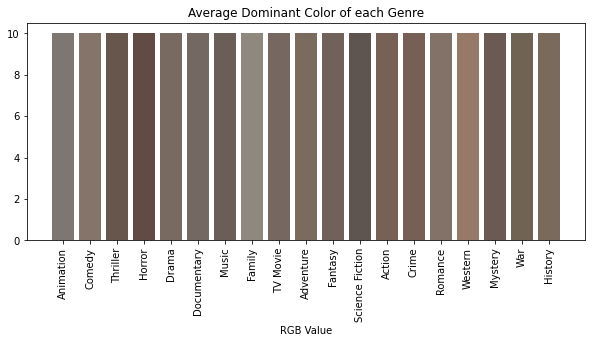

In [258]:
fig = plt.subplots(figsize = (10,4))
xarr = col_df.columns[7:-3]
yarr = []
for y in range(0, len(xarr)):
    yarr.append(10)
plt.bar(xarr,yarr,color=gen_col)
plt.xlabel('RGB Value')
plt.xticks(rotation=90)
plt.title('Average Dominant Color of each Genre')
plt.savefig('dom_color.png',bbox_inches='tight')

In [ ]:
gen_col = []
for x in col_df.columns[7:-3]:
    for y in col_df.columns[7:-3]:

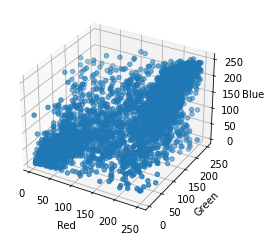

In [231]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=X[:,0], ys=X[:,1], zs= X[:,2])

ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()

In [152]:
imagePath = image_path

image = cv2.imread(imagePath)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.3,
    minNeighbors=3,
    minSize=(30, 30)
)

print("[INFO] Found {0} Faces.".format(len(faces)))

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    roi_color = image[y:y + h, x:x + w]
    print("[INFO] Object found. Saving locally.")
    cv2.imwrite(str(w) + str(h) + '_faces.jpg', roi_color)

status = cv2.imwrite('faces_detected.jpg', image)
print("[INFO] Image faces_detected.jpg written to filesystem: ", status)


[INFO] Found 0 Faces.
[INFO] Image faces_detected.jpg written to filesystem:  True
